In [2]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
df = pd.read_csv('../Datos/Modelo_1_CL_0.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,5175.171,36.402569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,384.372321,541.767494,592.905628,314.005759,585.468986
1,2892.510,36.188641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,327.393455,541.767494,592.905628,314.005759,219.412775
2,2862.675,35.674493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,389.883829,551.483986,619.755612,317.294856,218.312593
3,1822.080,35.570941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,389.883829,486.605127,513.804464,317.294856,218.312593
4,5083.960,34.484046,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,296.164486,136.798149,90.608182,314.585845,217.931319


In [ ]:
df.drop(colums='Shipping Cost', inplace=True)

In [ ]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [ ]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [ ]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [ ]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[442.77228759],
       [699.70005882],
       [-16.71899552]])

In [ ]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[255.87985032],
       [397.81501471],
       [850.15081508]])

In [ ]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [ ]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.571496,144.992363,170260.925297,412.62686
test,0.702376,139.083210,94720.175234,307.76643


Text(0, 0.5, 'Predicciones (y_test_pred)')

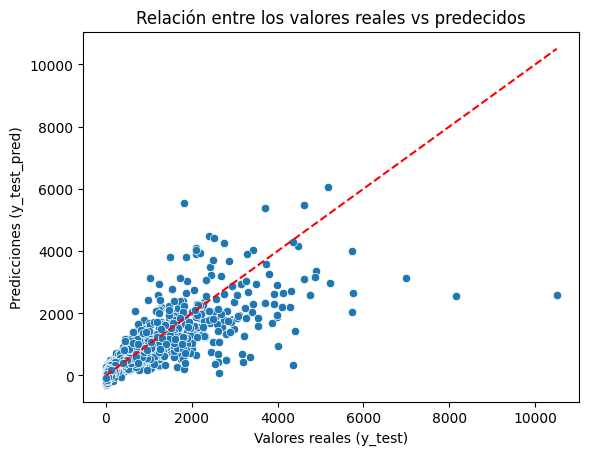

In [ ]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [ ]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [ ]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [ ]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [ ]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [ ]:
params_arbol_5 = {
    'max_depth': [5],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [17,20,22],
    'max_leaf_nodes': [38,40,42]
}

In [ ]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5], 'max_leaf_nodes': [38, 40, 42],
                         'min_samples_leaf': [17, 20, 22],
                         'min_samples_split': [45, 50, 55]},
             scoring='neg_mean_squared_error')

In [ ]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [ ]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=38, min_samples_leaf=20,
                      min_samples_split=50)

In [ ]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [ ]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [ ]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.646658,107.800711,140396.109532,374.694688
test,0.791926,103.511907,66220.535062,257.333509


In [ ]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
47,0.049706,0.001340,0.005037,0.002922,6,50,20,50,"{'max_depth': 6, 'max_leaf_nodes': 50, 'min_sa...",-113310.112822,-104962.826082,-73072.147418,-399605.019132,-74882.582395,-153166.537570,124247.773872,1
44,0.051428,0.002354,0.004821,0.001489,6,45,20,50,"{'max_depth': 6, 'max_leaf_nodes': 45, 'min_sa...",-113218.136781,-105077.703441,-73219.391709,-399646.074560,-74865.752241,-153205.411746,124244.214680,2
41,0.050478,0.002611,0.003729,0.000669,6,42,20,50,"{'max_depth': 6, 'max_leaf_nodes': 42, 'min_sa...",-113547.996314,-105143.243249,-72772.209600,-399523.537111,-75337.362390,-153264.869733,124167.803367,3
38,0.058425,0.011968,0.004709,0.000758,6,40,20,50,"{'max_depth': 6, 'max_leaf_nodes': 40, 'min_sa...",-114741.775439,-105254.809519,-73090.305730,-400881.010934,-75634.246075,-153920.429540,124543.224391,4
29,0.068111,0.010071,0.004210,0.000517,5,42,20,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-116064.134710,-108118.119300,-75191.401404,-401703.876871,-70605.361787,-154336.578814,124953.096750,5
35,0.037691,0.004656,0.003605,0.000581,5,50,20,50,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",-116064.134710,-108118.119300,-75191.401404,-401703.876871,-70605.361787,-154336.578814,124953.096750,5
32,0.043450,0.004969,0.005115,0.001467,5,45,20,50,"{'max_depth': 5, 'max_leaf_nodes': 45, 'min_sa...",-116064.134710,-108118.119300,-75191.401404,-401703.876871,-70605.361787,-154336.578814,124953.096750,5
26,0.079451,0.034916,0.008542,0.004904,5,40,20,50,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-116064.134710,-108118.119300,-75191.401404,-401703.876871,-70605.361787,-154336.578814,124953.096750,5
59,0.049760,0.007723,0.004364,0.000732,7,50,20,50,"{'max_depth': 7, 'max_leaf_nodes': 50, 'min_sa...",-114311.415715,-107751.254814,-76383.754349,-399049.620709,-76312.376616,-154761.684441,123142.352067,9
34,0.042272,0.008498,0.004028,0.000839,5,50,15,50,"{'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...",-118505.685638,-109070.501870,-75191.401404,-401247.810469,-69909.024413,-154784.884759,124650.706459,10


In [ ]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
47,6,50,20,50,-153166.537570
44,6,45,20,50,-153205.411746
41,6,42,20,50,-153264.869733
38,6,40,20,50,-153920.429540
29,5,42,20,50,-154336.578814
35,5,50,20,50,-154336.578814
32,5,45,20,50,-154336.578814
26,5,40,20,50,-154336.578814
59,7,50,20,50,-154761.684441
34,5,50,15,50,-154784.884759


In [ ]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [ ]:
df_rmse_prof

,param_max_depth,MSE
0,3,425.423684
1,4,405.007506
2,5,393.437936
3,6,393.737206
4,7,396.063675


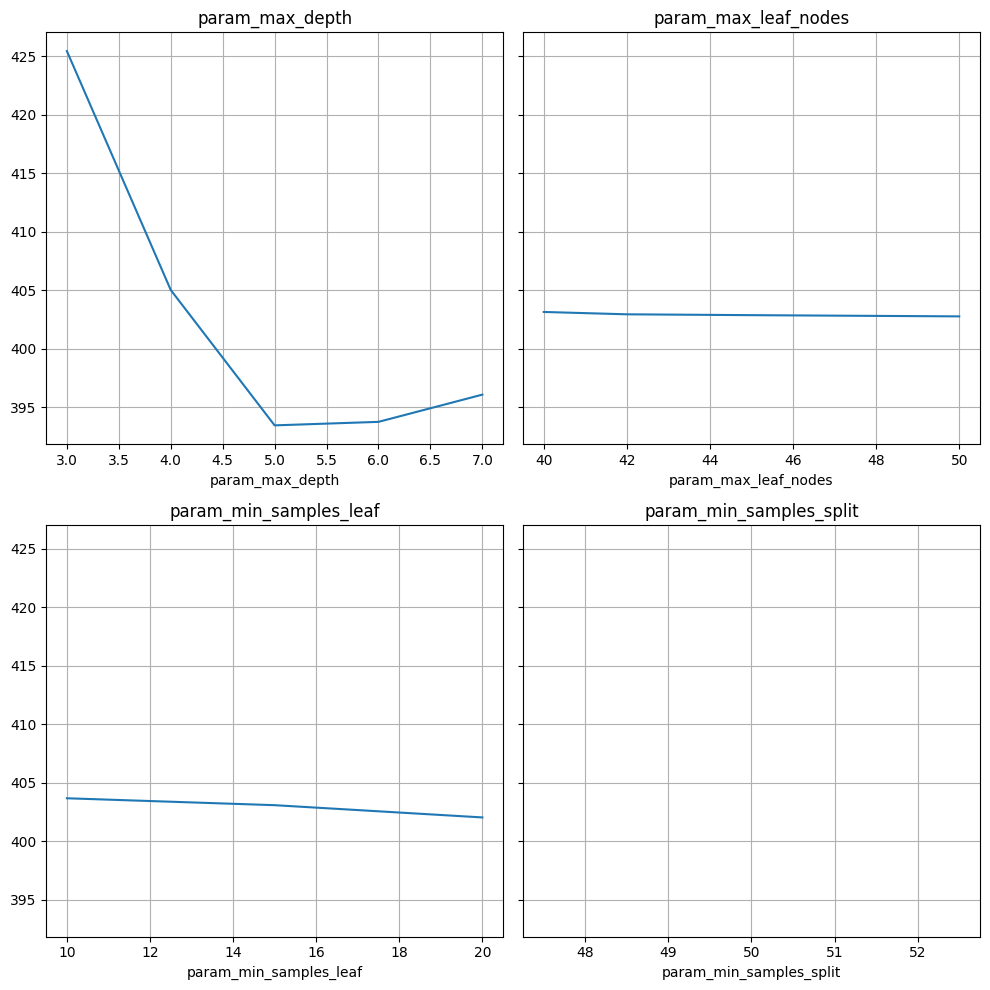

In [ ]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [ ]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

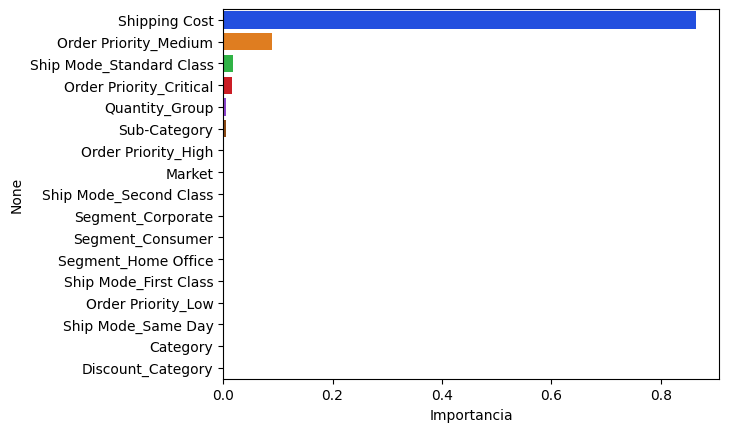

In [ ]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [ ]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=16, max_leaf_nodes=50,
                      min_samples_leaf=20, min_samples_split=45,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [ ]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.677112,95.091489,128295.41933,358.183500
test,0.818711,91.929950,57696.16297,240.200256


### Random Distinto

In [ ]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [15,18,20,22],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [42,45,28,50],
    'min_samples_leaf': [19,20,21], 
    'max_leaf_nodes': [50]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

## Gradient Booster

In [ ]:
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
modelo_final_gb

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

## XGB

In [ ]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [ ]:
modelo_final_xgb

In [ ]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb